

# Project: Investigate a Dataset - [Noshowappointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The data to be analyzed is the No Show Appointment dataset. This dataset is based on data collected from 100k Brazilian medical appointments and focuses on whether or not patients show up for their appointments. It also has various details about the patients such as their ages, hypertension, diabetes, scholarship, gender, neighbourhood whether they showed up for the appointment or not.

Column 
Description

PatientId
Number used to identify a specific patient

Appointment ID
Unique number used for appointments by the patients.

Gender
Indicates whether the patient is Male or Female

ScheduledDay
Tells us on what day the patient set up their appointment

AppointmentDay
Is the day the appointment is supposed to take place.

Age 
Indicates how old the patient is.

Neighbourhood
Geographical area where the patient lives.

Scholarship
Indicates whether or not the patient is enrolled in the Brasilian welfare program Bolsa Família.

Hypertension
Is a prevalent disorder in which the blood's long-term force against the arterial walls is great enough to create health problems.

Diabetes
Is a metabolic disorder that results in excessive blood sugar levels.

Alcoholism
Is a chronic condition marked by excessive drinking and obsession with alcohol.

Handicap
Is a disadvantage that makes progress or success difficult

SMS_Received
A reminder set to remind the patients about their appointments.

No-Show
Indicates whether the patient showed up for the appointment or not. ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.





### Question(s) for Analysis

1. What are the common trends that show up in patients that have a scholarship and those that don't?
2. How does Age affect the patient's ability to get a medical scholarship?
3. How does Diabetes affect the patient's ability to get a medical scholarship?
4. Investigate the relationship that exists between the patients' ages and hypertension, diabetes, alcoholism and handcap.

5. What is the number of  patients that are on a scholarship and those that are not?
6.  What is the number of patients with and without Hypertension?
7. What is the number of patients with and without Diabetes?
8.  What is the number of patients who suffer from Alcoholism and those that don't?
9. What is the number of patients who received the SMS and those that didn't?


In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

### Loading the dataset.

In [5]:
# Using pandas to load the dataset
no_show_df = pd.read_csv('noshowappointments-kagglev2-may-2016 (2).csv')


Using the head and the tail functions to view the first five and the last five records respectively.

In [6]:
# Previewing the first five and the last five records.
print(no_show_df.head())
print(no_show_df.tail())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

Using the shape function to get the number of rows and columns in the dataset.

In [7]:
print(no_show_df.shape)
# The dataset has 14 columns and 110527 rows

(110527, 14)


Using the info function to find more information about the dataset and its structure

In [8]:
no_show_df.info() #Checking the general information about this dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Using dtype function to get the types of data in each column

In [9]:
no_show_df.dtypes #Analyzing the types of data in each column.

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Checking for missing and duplicated values

Using the isnull function to get the number of missing values in the dataset.

In [10]:
no_show_df.isnull().sum()  #Checking for the null values in the dataframe.

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From the above output, the dataset has no missing values.

After checking the missing functions, it's time to check for the duplicate values in the dataset.This can be done through using the duplicated function.

In [11]:
no_show_df.duplicated().sum()  # checking for duplicates


0

The above output shows there are no duplicate values in the dataframe.


### Data Cleaning

Using the columns function,to identify any errors in the way the naming is done.

In [12]:
no_show_df.columns   # Analyzing the columns given in this dataframe.


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

The 'Hipertension'column is wrongly spelt. So there is a need to rename it correctly to 'Hypertension'.

In [13]:
no_show_df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)  #Correcting the spelling error of the name Hypertension from 'Hipertension' to 'Hypertension'.
no_show_df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


From the above, the colunm name has been correctly renamed to Hypertension.

This dataframe is cleaned and doesn't need much of cleaning.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (How does age affect the patient's ability to get a medical scholarship?)

To conduct an anlysis on patients'age and scholarship status, assign the patients on the Scholarship as'scholarship' and those who are not as'without'.

In [14]:
#Assigning variables to the Scholarship column, using scholarship and without scholarship.
scholarship = no_show_df.Scholarship == True
without = no_show_df.Scholarship == False

To understand better, it will be better to understand the mean age of the patients on the scholarship.

In [15]:
#Calculating the mean age of the patints with the scholarship in the dataframe.
no_show_df.Age[scholarship].mean()

30.616241598379524

From the above analysis, the mean age of the patients who are on a scholarship is 30.616.

To understand better, it will be better to understand the mean age of the patients who are not on the scholarship.

In [16]:
#Calculating the mean age of the patients without the scholarship in the dataframe.
no_show_df.Age[without].mean()

37.7942227038308

After using the mean function, the mean age of patients who are not on the scholarship is 37.79

Use the histo function to plot a histogram that shows the how age affects the ability of patients to have a scholarship.

In [20]:
def histo(a,b,c,d,title,xlab,ylab):   #Defining the histo function
  a.hist(alpha=0.5, bins=20, label= c)
  b.hist(alpha=0.5, bins=20, label= d)
  plt.title(title)
  plt.xlabel(xlab, fontsize=18)
  plt.ylabel(ylab, fontsize=18)
  plt.legend();  

The histo function has been developed, it will be use as well in the second question.

Using the histo function to visualize the relationship between age and scholarship.

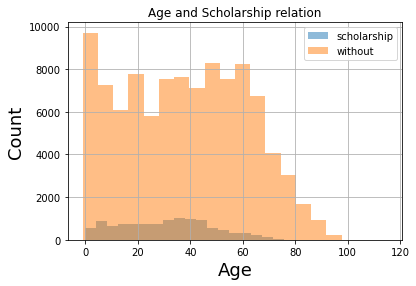

In [18]:
histo(no_show_df.Age[scholarship],no_show_df.Age[without],'scholarship','without','Age and Scholarship relation','Age','Count')

Analysis: From the above analysis on the question how age affects the ability of a patient to be enrolled in the Brasilian welfare program,it shows that the mean age for patients covered under the program is lower than those who are not covered. The mean age for patients covered is 30.616 while those who are not covered is 37.794. In addition to this, the number of patients who are under the scholarship is less compared to those who are not.

From the graph above, majority of the patients under the scholarship range from 0 to 40 years.

### Research Question 2  (How does gender affect the patient's ability to get a medical scholarship?)

To understand if gender affects a patient's ability to have a scholarship. To do this, dataframe of the patients will be analyzed by looking at the variable gender.

Using the histo function to visualize the relationship between the gender and scholarship.

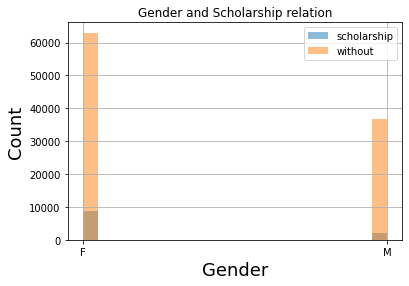

In [19]:
histo(no_show_df.Gender[scholarship],no_show_df.Gender[without],'scholarship','without','Gender and Scholarship relation','Gender','Count')

A histogram that shows the relationship between gender and scholarship.

There are more female patients than male patients and the histogram above indicates that more females are covered under the scholarship compared to men.

To further understand and ensure there's no bias, investigation on the dataframe will be done to know the number of male and female patients.

In [18]:
no_show_df.Gender.value_counts()  # to find the number of male and female patients.

F    71840
M    38687
Name: Gender, dtype: int64

### Research Question 3: How does Diabetes affects the patient's ability to get a medical scholarship?

In order to understand if patients with or without diabetes have a scholarship or not.

In [103]:
#Mean of Diabetic patients with and without the scholarship. 
diabetic = no_show_df.groupby('Diabetes').Scholarship.mean()
diabetic

Diabetes
0    0.100328
1    0.071635
Name: Scholarship, dtype: float64

Text(0, 0.5, 'Mean Count')

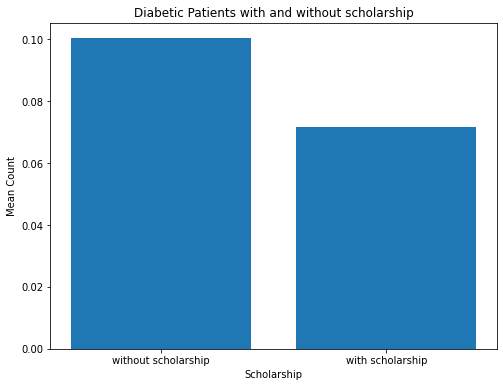

In [102]:
#Visualizing Diabetic patients with and without the scholarship.
label = ['without scholarship', 'with scholarship']
plt.figure(figsize=(8,6))
plt.bar(label,diabetic)
plt.title('Diabetic Patients with and without scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Mean Count') 

The above results indicate that the mean count of patients without the scholarship is higher thn those who have the scholarship. Those without the scholarship have a mean count of 0.1 and those who have the scholarship have a mean count of about 0.07.

### Research Question 4: Investigate the relationship that exists between the patients' ages and hypertension, diabetes, alcoholism and handcap.

Load the dataframe to show the columns in the dataframe.

Assign df to the dataframe to show a table form of the variables being investigated. These variables are age, hypertension, diabetes, alcoholism and handcap.

In [104]:
# Investigating the relationship between the variables listed below.
df = no_show_df[['Age', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap']] 
df

,Age,Hypertension,Diabetes,Alcoholism,Handcap
0,62,1,0,0,0
1,56,0,0,0,0
2,62,0,0,0,0
3,8,0,0,0,0
4,56,1,1,0,0
...,...,...,...,...,...
110522,56,0,0,0,0
110523,51,0,0,0,0
110524,21,0,0,0,0
110525,38,0,0,0,0


The above results have displayed a table containing the age, hypertension, diabetes, alcoholism and handcap. The dataframe has 110,527 rows and 5 columns.

After getting the dataframe for the variables to be investigated, using the corr function, the relationship between these variables can be established in a table format.

In [105]:
#Finding the relationshp between the variables given that is age, hypertension, diabetes, alcoholism and handcap.
corr_matrix = df.corr()
corr_matrix

,Age,Hypertension,Diabetes,Alcoholism,Handcap
Age,1.000000,0.504586,0.292391,0.095811,0.078033
Hypertension,0.504586,1.000000,0.433086,0.087971,0.080083
Diabetes,0.292391,0.433086,1.000000,0.018474,0.057530
Alcoholism,0.095811,0.087971,0.018474,1.000000,0.004648
Handcap,0.078033,0.080083,0.057530,0.004648,1.000000


After using the corr function, a relationship between the variables has been established. 

To get a better understanding of the relationship between the variables, a heatmap can be created using seaborn to investigate the extent of the relationship between different variables. 

Text(33.0, 0.5, 'Variables')

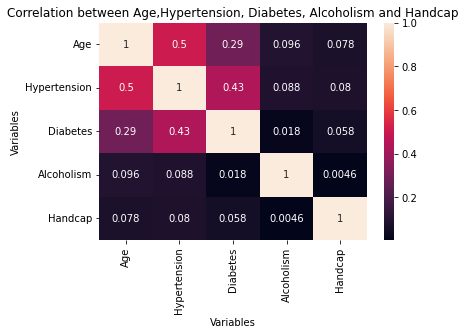

In [106]:
#Plitting a heatmap to show the relationship between the different variables from the dataframe.
sns.heatmap(corr_matrix, annot= True )
plt.title('Correlation between Age,Hypertension, Diabetes, Alcoholism and Handcap')
plt.xlabel('Variables')
plt.ylabel('Variables')

From the above heat map, there's a clear indication that there is a positie relationship among the variables because all the figures are positive. There is a strong relationship between age and hypertension by 0.5, followed by diabetes which is 0.29. Chances of a patient who has hypertension developing diabetes is high and it's by 0.43.
There's a weak realtionship between alcoholism and handcap.

### Question 1. What is the number of  patients that are on a scholarship and those that are not?

To get the number of patients with and without the scholarship, the function count is used.

In [90]:
def counts(col):     #Creating the counts function to be used in the subsequent questions.
    values = col.value_counts()
    return values 

The function count has been established.

Using the count function, the number of patients with and without the Scholarship can be obtained as shown below.

In [89]:
with_without_scholarship = counts(no_show_df['Scholarship']) # Finding the total number of patients with and without the scholarship.
with_without_scholarship

0    99666
1    10861
Name: Scholarship, dtype: int64

After executing the count function, the number of patients without the scholarship is 99,666 and that of patients with the scholarship is 10,861.

In order to create a visualization for the data of patients with and without Scholarship, the pie function will be used.

In [91]:
def pie(values, title):    # Creating the pie function to be used in the subsequent questions.
    labels = ['without','with']
    explode = (0,0.1)
    fig1, ax1 = plt.subplots()
    ax1.pie(values, explode=explode, labels=labels,autopct = '%1.1f%%',shadow=True, startangle=90)
    plt.title(title); 

The pie function is developed.

The pie function will be used to create a pie chart visualizing patients and without the Scholarship.

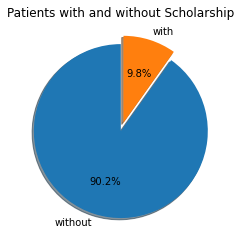

In [87]:
pie(with_without_scholarship,'Patients with and without Scholarship')  #Visualizing patients with and without the scholarship.

The visualization above shows the percentage of patients with and without the scholarship. Those with the scholarship is 9.8% and those without is 90.2%.

### Question 2. What is the number of patients with and without Hypertension?

Using the counts function, the number of patients with and without hypertension can be established. 

In [86]:
with_without_hypertension = counts(no_show_df[ 'Hypertension'])  #Calculating the totals of patients with and without hypertension.
with_without_hypertension

0    88726
1    21801
Name: Hypertension, dtype: int64

After using the count function, the number of patients with and without diabetes has been established. 88,726 patients don't have diabetes while 21,801 have diabetes.

Using the pie function, the number of patients with and without hypertension can be visualized.

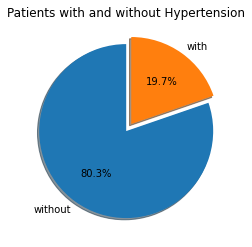

In [85]:
pie(with_without_hypertension,'Patients with and without Hypertension')  #Visualizing patients with and without hypertension.

Using the pie function, the number of patients with and without diabetes has been visualized, patients with hypertension is 19.7% and those without 80.3%.

### Question 3. What is the number of patients with and without Diabetes?

Using the counts function, the number of patients with and without diabetes can be established

In [84]:
with_without_diabetes = counts(no_show_df['Diabetes'])  #Finding the total number of patients with and without diabetes.
with_without_diabetes

0    102584
1      7943
Name: Diabetes, dtype: int64

After using the count function, the number of patients with and without diabetes has been established. 102,584 patients don't have diabetes while 7,943 have diabetes.

Using the pie function, the number of patients with and without diabetes can be visualized

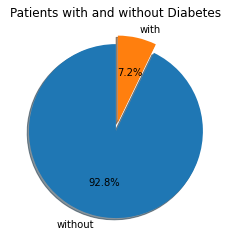

In [83]:
pie(with_without_diabetes,'Patients with and without Diabetes')  #Visualizing patients with and without diabetes.

Using the pie function, the number of patients with and without diabetes has been visualized, patients with diabetes is 7.2% and those without 92.8%.

### Question 4. What is the number of patients who suffer from Alcoholism and those that don't?

Using the counts function, the number of patients with and without alcoholism can be established

In [82]:
with_without_alcoholism = counts(no_show_df['Alcoholism'])     #Finding the totals of patients with and without alcoholism.
with_without_alcoholism

0    107167
1      3360
Name: Alcoholism, dtype: int64

After using the count function, the number of patients with and without diabetes has been established.  107,167 patients don't have suffer from alcoholism while 3,360 suffer from alcoholism.

Using the pie function, the number of patients with and without alcoholism  can be visualized

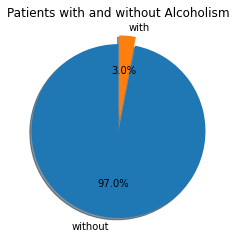

In [81]:
pie(with_without_alcoholism,'Patients with and without Alcoholism')  #Visualizing the patients suffering from alcoholism and those who are not suffering from alcoholism.

Using the pie function, the number of patients with and without diabetes has been visualized, patients suffering from diabetes is 3.0% and those without 97.0%.

### Question 5. What is the number of patients who received the SMS and those that didn't?

Using the counts function, the number of patients who received SMS and those who did not receive the SMS can be established.

In [80]:
with_without_sms = counts(no_show_df['SMS_received'])       #Finding the totals for the patients who received and didn't receive the SMS.
with_without_sms        

0    75045
1    35482
Name: SMS_received, dtype: int64

The number of patients who received the SMS is 75,045 and those who did not is 35,482.

Using the pie function, the number of patients who received and didn't receive the SMS  can be visualized.

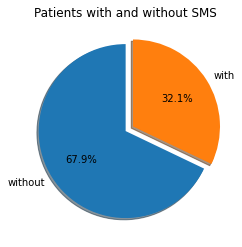

In [79]:
pie(with_without_sms,'Patients with and without SMS')      #Visualizing the patients that received and didn't receive the SMS.

Using the pie function, the number of patients who received and didn't receive the SMS has been visualized, patients who received the SMS is 32.1% and those that didn't is 67.9%.

<a id='conclusions'></a>
## Conclusions



The main research question was what are some of the common trends that are seen in patients on a scholarship and those who are not. To investigate this, age, gender,and diabetes variables were investigated.
In addition to this, a relationship between the variables age, hypertension, diabetes, alcoholism and handcap was investigated.
 
To the first question about how age infuences a patient's ability to have a scholarship, it was established that patients who range from 0 to 40 years are more compared to the elder ones from 40 to 80. 
With the age variable, the mean age for patients covered under the program is lower than those who are not covered. The mean age for patients covered is 30.616 while those who are not covered is 37.794.

In this dataframe, the number of female patients is higher than that of male patients and so is the number of those who are under the scholarship. However, it was established that generally the number of female patients is higher than that of the male patients. The females in this dataframe is 71,840 and the males is 38687. 

The mean count of diabetes patients without the schoraship is 0.1 which is higher than those with the scholarship which is 0.07. 

There is a strong relationship between age and hypertension meaning that there is a high chance of older patients having hypertension. There's also a higher relationship between hypertension and diabetes. This means that is a patient has hypertension, there's a higher likelihood of them having diabetes as well.There's a week relationship between alcoholism and handcap.

In addition to this, the number of patients suffering from diabetes, hyertension, alcoholism, is less compared to those not suffering. The number of patients on a scholarship and those that received the SMS is less compared to those that don't have and didn't receive the SMS.

### Limitations
The dataframe had a lot of categorical data which limits statistical analysis.

## Submitting your Project 



In [75]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb']) 